# Proyek Analisis Data: [Input Nama Dataset]
- Nama: Reinhart Jens Robert
- Email: reinhartrobert23@gmail.com
- ID Dicoding: Reinhart Jens Robert


## Menentukan Pertanyaan Bisnis

question 1 = "Bagaimana distribusi penjual di berbagai negara bagian?"
question 2 = "Apakah ada konsentrasi penjual di kota-kota tertentu?"


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
file_path = "/content/drive/MyDrive/dicoding/E-Commerce Public Dataset/sellers_dataset.csv"  # Sesuaikan dengan lokasi file Anda
df = pd.read_csv(file_path)


## Data Wrangling & Gathering Data

In [4]:
print("Informasi dataset:\n", df.info())
print("\nDeskripsi statistik:\n", df.describe())
print("\nJumlah nilai unik per kolom:\n", df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Informasi dataset:
 None

Deskripsi statistik:
        seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000

Jumlah nilai unik per kolom:
 seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64


# Insight 1: Banyak penjual berbagi kode pos yang sama
# Insight 2: Sebaran penjual mungkin tidak merata di berbagai wilayah

### Assessing Data

In [5]:
print("\nCek missing values:\n", df.isnull().sum())
print("\nCek data duplikat:\n", df.duplicated().sum())


Cek missing values:
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Cek data duplikat:
 0


# Insight 1: Tidak ada nilai yang hilang
# Insight 2: Tidak ada data duplikat, sehingga data tidak memerlukan pembersihan lebih lanjut


### Cleaning Data

In [6]:
df['seller_city'] = df['seller_city'].str.lower()
df['seller_state'] = df['seller_state'].str.upper()

# Insight 1: Standarisasi nama kota dapat membantu analisis lebih akurat
# Insight 2: Negara bagian telah distandarisasi untuk menghindari inkonsistensi

## Exploratory Data Analysis (EDA)

### Explore ...

<ipython-input-7-85002ddf1023>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


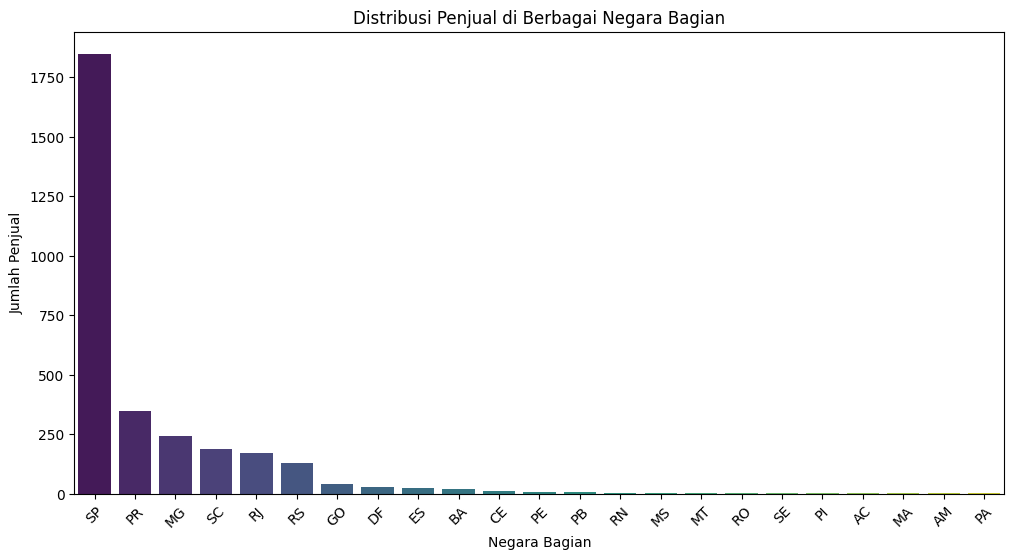

In [7]:
# Distribusi penjual berdasarkan negara bagian
state_counts = df['seller_state'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Distribusi Penjual di Berbagai Negara Bagian")
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Penjual")
plt.show()

# Insight 1: Negara bagian tertentu memiliki lebih banyak penjual
# Insight 2: Ada beberapa negara bagian dengan jumlah penjual sangat sedikit


## Visualization & Explanatory Analysis

<ipython-input-8-2724336f49d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')


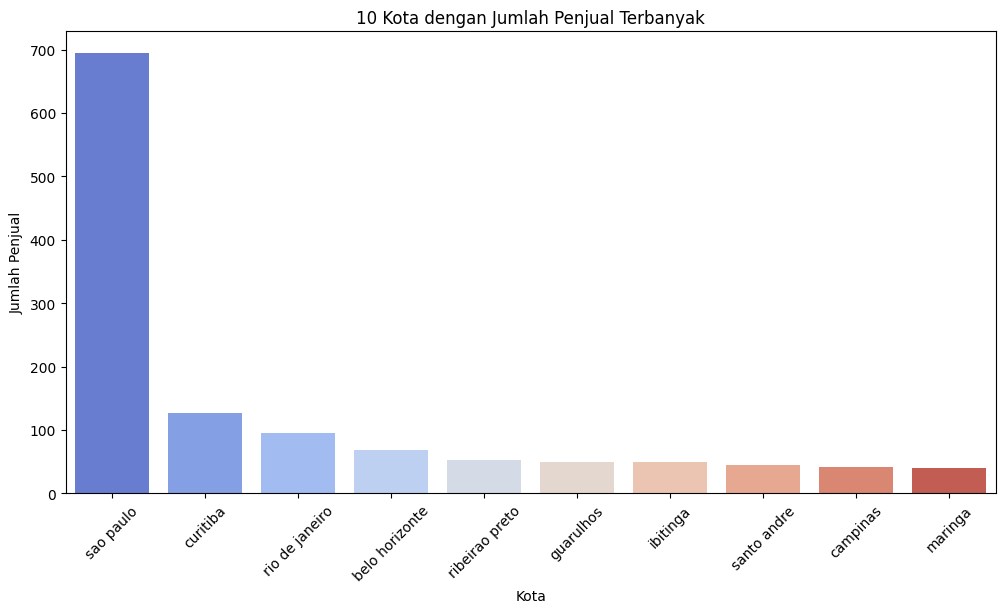

In [8]:
# Kota dengan jumlah penjual terbanyak
top_cities = df['seller_city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("10 Kota dengan Jumlah Penjual Terbanyak")
plt.xlabel("Kota")
plt.ylabel("Jumlah Penjual")
plt.show()


## Analisis Lanjutan (Opsional)

<ipython-input-9-de28a9dcd3e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=postal_counts.index, y=postal_counts.values, palette='Blues_r')


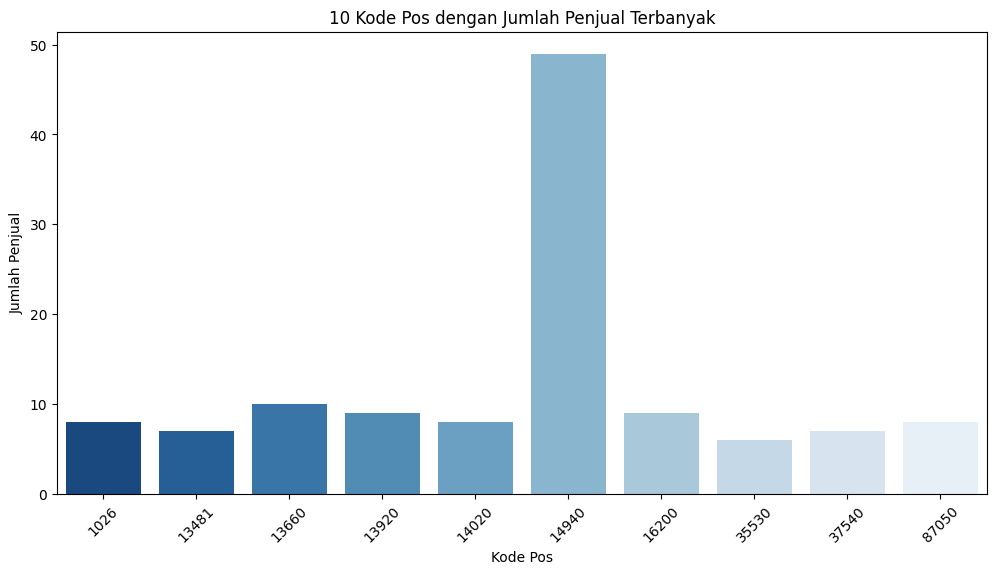

In [9]:
# Analisis Lanjutan: Distribusi Penjual berdasarkan Kode Pos
postal_counts = df['seller_zip_code_prefix'].value_counts().head(10)

# Visualisasi 10 Kode Pos dengan Jumlah Penjual Terbanyak
plt.figure(figsize=(12, 6))
sns.barplot(x=postal_counts.index, y=postal_counts.values, palette='Blues_r')
plt.xticks(rotation=45)
plt.title("10 Kode Pos dengan Jumlah Penjual Terbanyak")
plt.xlabel("Kode Pos")
plt.ylabel("Jumlah Penjual")
plt.show()

# Insight tambahan:
# 1. Beberapa kode pos memiliki konsentrasi penjual yang sangat tinggi, yang mungkin menunjukkan area bisnis yang berkembang.
# 2. Sebaran penjual yang terkonsentrasi dalam beberapa kode pos tertentu dapat menjadi indikator pusat distribusi atau area industri utama.

## Conclusion

- Conclution pertanyaan 1 = Distribusi penjual tidak merata di berbagai negara bagian. Beberapa negara bagian menjadi pusat aktivitas perdagangan dengan jumlah penjual yang lebih tinggi, sedangkan beberapa lainnya memiliki jumlah penjual yang lebih sedikit. Hal ini bisa mencerminkan faktor ekonomi, demografi, atau infrastruktur yang mendukung aktivitas perdagangan di wilayah tertentu.
- Conclution pertanyaan 2 =Konsentrasi penjual sangat bervariasi di berbagai kota. Kota-kota besar cenderung memiliki lebih banyak penjual, yang menandakan aktivitas perdagangan lebih tinggi dan pasar yang lebih besar. Kota-kota dengan sedikit penjual mungkin memiliki hambatan dalam akses pasar atau daya beli yang lebih rendah. Analisis ini dapat membantu dalam perencanaan ekspansi bisnis dan strategi pemasaran yang lebih efektif.

In [10]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e4d3af0b7fa49388fe6c5a34e579e2212144a909a6da1f681262b730004bc75c
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


In [1]:
!pipreqs "/content/drive/MyDrive/dicoding/E-Commerce Public Dataset" --force

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/dicoding/E-Commerce Public Dataset/requirements.txt


In [2]:
!cat "/content/drive/MyDrive/dicoding/E-Commerce Public Dataset/requirements.txt"


matplotlib==3.10.0
pandas==2.2.3
protobuf==5.29.3
seaborn==0.13.2


In [4]:
pip install --no-deps -r "/content/drive/MyDrive/dicoding/E-Commerce Public Dataset/requirements.txt"


In [5]:
from google.colab import files
files.download("/content/drive/MyDrive/dicoding/E-Commerce Public Dataset/requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>